# Import Packages

In [108]:
# original project: https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import os
%matplotlib inline

# Import Data

In [25]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [35]:
# import data as df

df = pd.read_csv('../input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


# Explore data and drop nulls

In [36]:
# check sum of nulls
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [37]:
# value counts
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [38]:
# drop nas
df = df.dropna()

# Visualize Data


<AxesSubplot:>

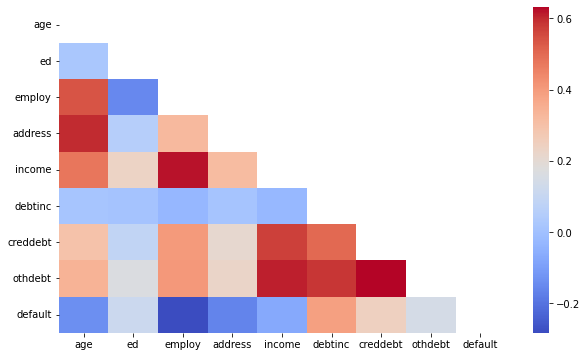

In [92]:
# compute the correlation matrix and mask upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, mask=mask, cmap='coolwarm')

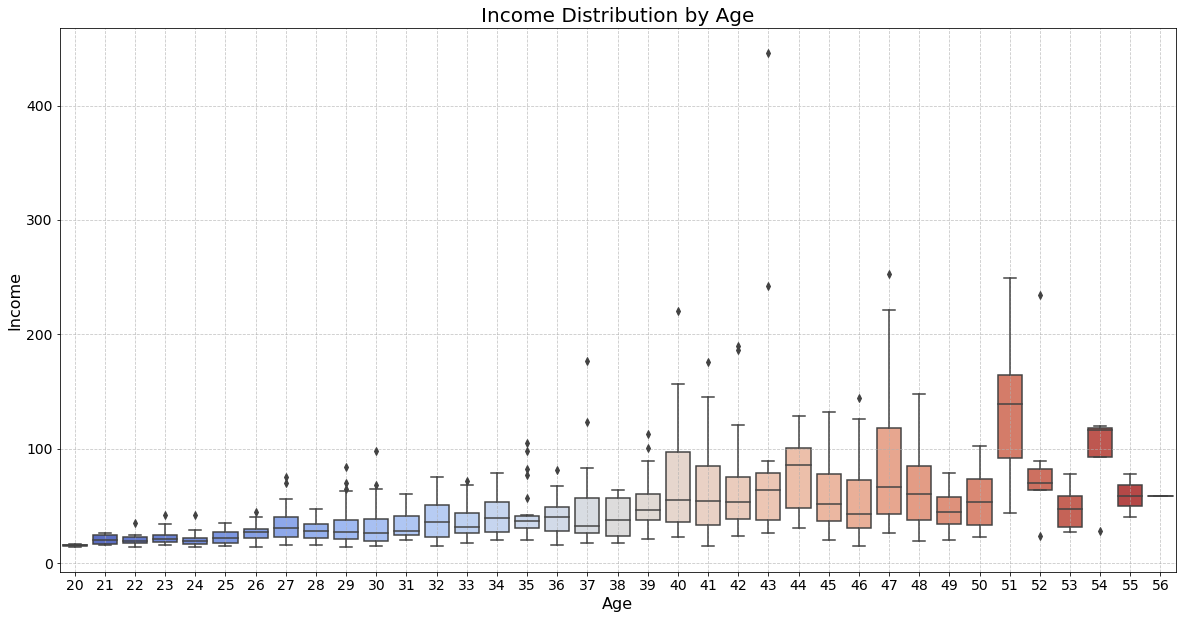

In [57]:
# age and income
# create the figure and the line that will go in it
fig, ax = plt.subplots(figsize=(20, 10))

# customizing the boxplot with Seaborn
sns.boxplot(x='age', y='income', data=df, ax=ax, palette='coolwarm')

# adding titles and labels
ax.set_title('Income Distribution by Age', fontsize=20)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Income', fontsize=16)

# customizing ticks for better readability
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# adding grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

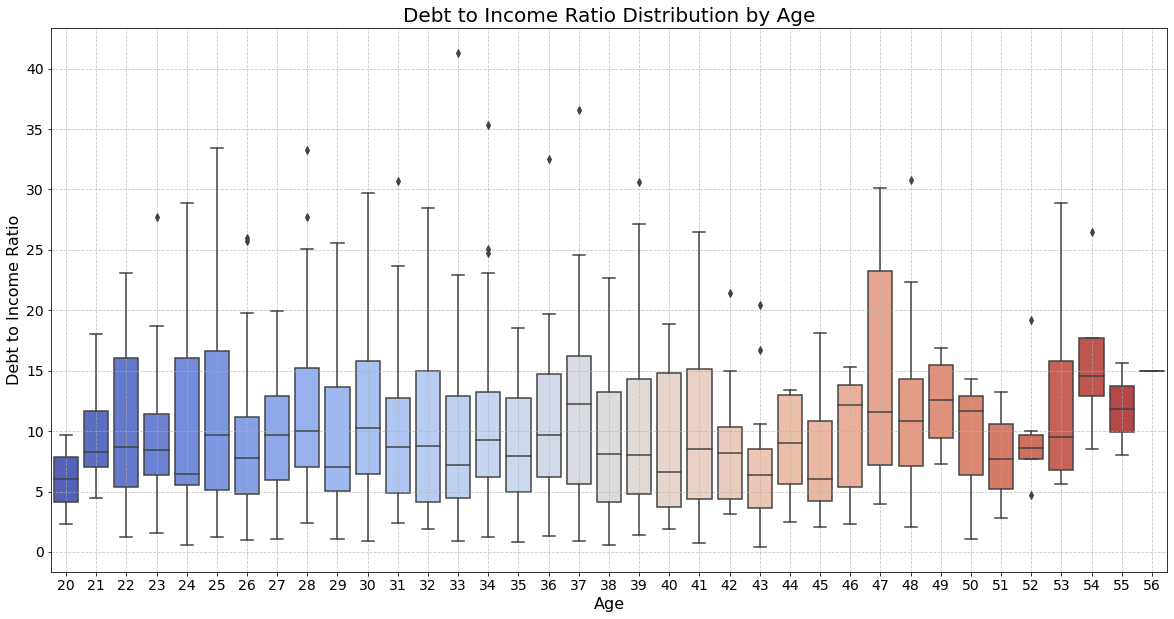

In [61]:
# age and debt to income ratio
# create the figure and the line that will go in it
fig, ax = plt.subplots(figsize=(20, 10))

# customizing the boxplot with Seaborn
sns.boxplot(x='age', y='debtinc', data=df, ax=ax, palette='coolwarm')

# adding titles and labels
ax.set_title('Debt to Income Ratio Distribution by Age', fontsize=20)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Debt to Income Ratio', fontsize=16)

# customizing ticks for better readability
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# adding grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

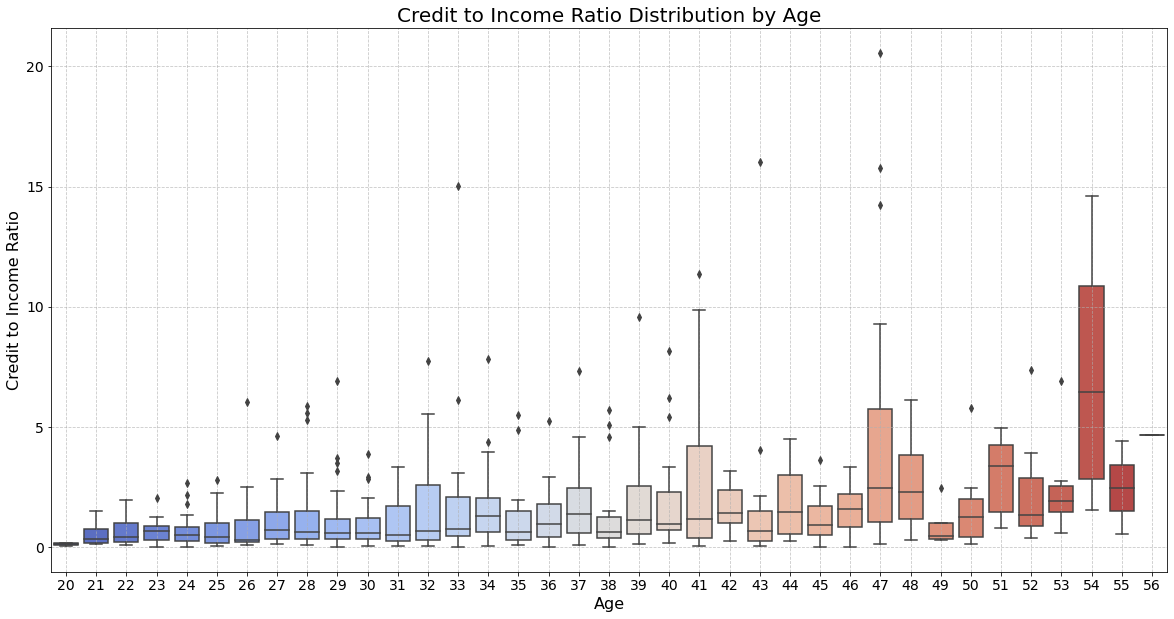

In [62]:
# age and credit to income ratio
# create the figure and the line that will go in it
fig, ax = plt.subplots(figsize=(20, 10))

# customizing the boxplot with Seaborn
sns.boxplot(x='age', y='creddebt', data=df, ax=ax, palette='coolwarm')

# adding titles and labels
ax.set_title('Credit to Income Ratio Distribution by Age', fontsize=20)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Credit to Income Ratio', fontsize=16)

# customizing ticks for better readability
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# adding grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Set Data up for Models

In [65]:
# count defaults
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Create Models

In [68]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

In [70]:
# Mean accuracy score
rfc.score(x_test, y_test)

0.7785714285714286

In [71]:
# cross validation score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv=10)
rfc2.mean()

0.7821428571428573

In [72]:
# support vector machine
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [73]:
# Mean accuracy score
sv.score(x_test, y_test)

0.7785714285714286

In [76]:
model = GridSearchCV(sv, {
    'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],  
    'kernel': ['rbf', 'linear'],}, scoring='accuracy', cv=5) 

In [77]:
# fit for grid search model
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy')

In [79]:
# best parameters
model.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'linear'}

In [116]:
# model with best params, and accuracy score
svc_2 = SVC(C=10.0,gamma=0.01,kernel='linear')
svc_2.fit(x_train,y_train)
svc_2.score(x_test,y_test)

0.8142857142857143

In [127]:
# logistic regression and accuracy score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.85

In [119]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging_log_reg = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_log_reg.fit(x_train, y_train)




BaggingClassifier(base_estimator=LogisticRegression(), random_state=0)

In [120]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier for logistic regression
adaboost_log_reg = AdaBoostClassifier(base_estimator=lr, n_estimators=50, random_state=0)
adaboost_log_reg.fit(x_train, y_train)



AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=0)

# Ensemble & Stacking Models

In [107]:
lr_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [111]:
# simple voting classifier of the three models

rfc_pred = rfc.predict(x_test)
svc_2_pred = svc_2.predict(x_test)
lr_pred = lr.predict(x_test)

final_predictions = (rfc_pred + svc_2_pred + lr_pred) / 3



#voting classifier
voting_clf = VotingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    voting='hard')

# fit the ensemble model
voting_clf.fit(x_train, y_train)

# make predictions
voting_ensemble_predictions = voting_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_predictions)

0.8357142857142857

In [113]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking Classifier with the base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    final_estimator=LogisticRegression()  # Using Logistic Regression as the meta-model
)

# Fit the ensemble model
stacking_clf.fit(x_train, y_train)

# Make predictions
stacking_classifier_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_classifier_predictions)

0.8285714285714286

In [124]:
# another voting classifer with 
from sklearn.ensemble import VotingClassifier

# Create a combined ensemble model
combined_model = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    voting='hard'
)
combined_model.fit(x_train, y_train)

# make predictions
voting_ensemble_2_predictions = combined_model.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_2_predictions)

0.85

In [126]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(x_train, y_train)

# make predictions
stacking_2_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_2_predictions)

0.8285714285714286

# Testing out feature engineering with PyCaret

In [130]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [132]:
from pycaret.classification import *

clf1 = setup(df, target='default', polynomial_features=True)
 #            , feature_interaction=True)


,Description,Value
0,Session id,3619
1,Target,default
2,Target type,Binary
3,Original data shape,"(700, 9)"
4,Transformed data shape,"(700, 45)"
5,Transformed train set shape,"(489, 45)"
6,Transformed test set shape,"(211, 45)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [138]:
transformed_data = get_config('X_train')
transformed_data

,age,ed,employ,address,income,debtinc,creddebt,othdebt
175,26,1,6,0,22,10.3,0.720588,1.545412
681,20,1,4,0,14,9.7,0.200984,1.157016
659,42,2,12,9,55,15.0,2.532750,5.717250
151,43,1,13,23,76,6.1,2.151104,2.484896
67,39,1,19,8,46,9.1,2.515786,1.670214
...,...,...,...,...,...,...,...,...
68,28,2,8,3,31,8.2,1.492154,1.049846
483,25,2,6,2,26,4.5,0.070200,1.099800
38,28,2,1,8,24,17.1,1.337904,2.766096
178,37,1,13,5,24,8.9,0.602352,1.533648


In [134]:
clf1 = setup(df, target='default', n_jobs=1)
rf_model = create_model('rf', n_jobs=1)  # Random Forest


,Description,Value
0,Session id,6524
1,Target,default
2,Target type,Binary
3,Original data shape,"(700, 9)"
4,Transformed data shape,"(700, 9)"
5,Transformed train set shape,"(489, 9)"
6,Transformed test set shape,"(211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7347,0.7534,0.1667,0.4000,0.2353,0.1066,0.1216
1,0.8163,0.8504,0.5385,0.7000,0.6087,0.4913,0.4986
2,0.7755,0.7959,0.3077,0.6667,0.4211,0.3045,0.3396
3,0.8571,0.8761,0.5385,0.8750,0.6667,0.5822,0.6100
4,0.8571,0.9562,0.5385,0.8750,0.6667,0.5822,0.6100
5,0.7551,0.8376,0.2308,0.6000,0.3333,0.2181,0.2556
6,0.7143,0.7810,0.3846,0.4545,0.4167,0.2292,0.2306
7,0.7755,0.8333,0.3846,0.6250,0.4762,0.3435,0.3599
8,0.7755,0.7041,0.5385,0.5833,0.5600,0.4096,0.4102


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [141]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the transformer
poly = PolynomialFeatures(2)

# Fit and transform your original dataframe (excluding the target)
X_poly = poly.fit_transform(df.drop('default', axis=1))

# Create a new dataframe with the polynomial features
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(df.columns))

# Add the target column back
df_poly['default'] = df['default']

# Now you can use this new dataframe with PyCaret
clf1 = setup(df_poly, target='default', n_jobs=1)


,Description,Value
0,Session id,5765
1,Target,default
2,Target type,Binary
3,Original data shape,"(700, 46)"
4,Transformed data shape,"(700, 46)"
5,Transformed train set shape,"(489, 46)"
6,Transformed test set shape,"(211, 46)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


In [142]:
rf_model = create_model('rf', n_jobs=1)  # Random Forest


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8776,0.9199,0.6923,0.8182,0.7500,0.6697,0.6738
1,0.7755,0.7885,0.5385,0.5833,0.5600,0.4096,0.4102
2,0.7143,0.7372,0.5385,0.4667,0.5000,0.3014,0.3029
3,0.7959,0.8194,0.3846,0.7143,0.5000,0.3860,0.4152
4,0.8367,0.9081,0.5385,0.7778,0.6364,0.5355,0.5506
5,0.7755,0.7382,0.3846,0.6250,0.4762,0.3435,0.3599
6,0.8980,0.9060,0.7692,0.8333,0.8000,0.7317,0.7327
7,0.6939,0.7105,0.3077,0.4000,0.3478,0.1522,0.1545
8,0.8367,0.8750,0.5000,0.7500,0.6000,0.5025,0.5188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [143]:
df_poly

,1,age,ed,employ,address,income,debtinc,creddebt,othdebt,age^2,...,income debtinc,income creddebt,income othdebt,debtinc^2,debtinc creddebt,debtinc othdebt,creddebt^2,creddebt othdebt,othdebt^2,default
0,1.0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1681.0,...,1636.8,1999.252992,881.515008,86.49,105.642346,46.580054,129.035787,56.894742,25.086154,1.0
1,1.0,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,729.0,...,536.3,42.228262,124.024738,299.29,23.566095,69.213805,1.855594,5.449895,16.006385,0.0
2,1.0,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,1600.0,...,302.5,47.084125,119.290875,30.25,4.708413,11.929088,0.732864,1.856762,4.704236,0.0
3,1.0,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,1681.0,...,348.0,319.046400,98.553600,8.41,7.710288,2.381712,7.068792,2.183554,0.674501,0.0
4,1.0,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,576.0,...,484.4,50.048208,85.583792,299.29,30.922643,52.878557,3.194927,5.463413,9.342583,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1296.0,...,124.2,7.075674,26.458326,21.16,1.205485,4.507715,0.068676,0.256805,0.960278,1.0
696,1.0,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,841.0,...,241.5,7.759395,42.955605,132.25,4.249193,23.523307,0.136527,0.755804,4.184091,0.0
697,1.0,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,1089.0,...,243.2,15.720448,62.103552,57.76,3.733606,14.749594,0.241340,0.953414,3.766456,0.0
698,1.0,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,2025.0,...,646.8,177.300816,320.735184,70.56,19.341907,34.989293,5.302004,9.591265,17.350491,0.0


# Create Models x2 With Engineered Features

In [144]:
# set x values and y
x = df_poly.drop(['default'],axis=1)
y = df_poly['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [145]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [146]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [147]:
# Mean accuracy score
rfc.score(x_test, y_test)

0.7357142857142858

In [148]:
# cross validation score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv=10)
rfc2.mean()

0.8035714285714285

In [149]:
# support vector machine
sv = SVC()
sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
# Mean accuracy score
sv.score(x_test, y_test)

0.7428571428571429

In [151]:
model = GridSearchCV(sv, {
    'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],  
    'kernel': ['rbf', 'linear'],}, scoring='accuracy', cv=5) 

In [152]:
# fit for grid search model
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [153]:
# best parameters
model.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

In [156]:
# model with best params, and accuracy score
svc_2 = SVC(C=1.0,gamma=0.01,kernel='linear')
svc_2.fit(x_train,y_train)
svc_2.score(x_test,y_test)

0.7571428571428571

In [155]:
# logistic regression and accuracy score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7714285714285715

In [159]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging_log_reg = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_log_reg.fit(x_train, y_train)
bagging_log_reg.score(x_test,y_test)



0.7642857142857142

In [160]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier for logistic regression
adaboost_log_reg = AdaBoostClassifier(base_estimator=lr, n_estimators=50, random_state=0)
adaboost_log_reg.fit(x_train, y_train)
adaboost_log_reg.score(x_test,y_test)


0.7571428571428571

# Ensemble & Stacking Models

In [161]:
lr_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [162]:
# simple voting classifier of the three models

rfc_pred = rfc.predict(x_test)
svc_2_pred = svc_2.predict(x_test)
lr_pred = lr.predict(x_test)

final_predictions = (rfc_pred + svc_2_pred + lr_pred) / 3



#voting classifier
voting_clf = VotingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    voting='hard')

# fit the ensemble model
voting_clf.fit(x_train, y_train)

# make predictions
voting_ensemble_predictions = voting_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_predictions)

0.7785714285714286

In [163]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking Classifier with the base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    final_estimator=LogisticRegression()  # Using Logistic Regression as the meta-model
)

# Fit the ensemble model
stacking_clf.fit(x_train, y_train)

# Make predictions
stacking_classifier_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_classifier_predictions)

0.7642857142857142

In [164]:
# another voting classifer with 
from sklearn.ensemble import VotingClassifier

# Create a combined ensemble model
combined_model = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    voting='hard'
)
combined_model.fit(x_train, y_train)

# make predictions
voting_ensemble_2_predictions = combined_model.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_2_predictions)

0.7714285714285715

In [165]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(x_train, y_train)

# make predictions
stacking_2_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_2_predictions)

0.7642857142857142

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Load example data
# x, y = load_iris(return_X_y=True)

# Create the model
model = RandomForestClassifier()

# Fit the model
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_
print("Feature importances: ", importances)


Feature importances:  [0.         0.01888932 0.00222007 0.02447872 0.01309115 0.01506093
 0.04713248 0.02726949 0.01906936 0.01948555 0.0170246  0.04101983
 0.0165045  0.02021145 0.03228571 0.02186972 0.01683331 0.00459535
 0.02030413 0.01802703 0.01739765 0.04857073 0.03280831 0.02271841
 0.029746   0.02580286 0.03526367 0.02147846 0.01839267 0.01911635
 0.01429427 0.02150139 0.01484074 0.01942569 0.01596961 0.01871572
 0.02093128 0.01932137 0.01843824 0.04306646 0.03888864 0.02566232
 0.02443627 0.02128868 0.01655147]


In [169]:
# Sort feature importances in descending order and get the indices of the top 10 features
indices = np.argsort(importances)[::-1][:10]

# Filter your dataset to include only the top 10 features
X_filtered = x[:, indices]

TypeError: '(slice(None, None, None), array([21,  6, 39, 11, 40, 26, 22, 14, 24,  7]))' is an invalid key

In [171]:
# Create the model
model = RandomForestClassifier()

# Fit the model
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order and get the indices of the top 10 features
indices = np.argsort(importances)[::-1][:10]

# Filter your dataset to include only the top 10 features
X_filtered = x.take(indices, axis=1)


print("Indices of top 10 features:", indices)

Indices of top 10 features: [21 40 11  6  3 26 14 39 22  7]


In [189]:
df_poly.default

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [192]:
# Get the column names of the top 10 features
top_10_columns = df_poly.columns[indices]


In [193]:
# Add 'default' to the list of top 10 columns
top_10_columns_with_target = top_10_columns.tolist() + ['default']

# Filter the DataFrame to only include the top 10 features and 'default'
df_filtered = df_poly[top_10_columns_with_target]


In [194]:
# set x values and y
x = df_filtered.drop(['default'],axis=1)
y = df_filtered['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [195]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [196]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [197]:
# Mean accuracy score
rfc.score(x_test, y_test)

0.7857142857142857

In [198]:
# cross validation score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv=10)
rfc2.mean()

0.7803571428571427

In [199]:
# support vector machine
sv = SVC()
sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
# Mean accuracy score
sv.score(x_test, y_test)

0.8

In [201]:
model = GridSearchCV(sv, {
    'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],  
    'kernel': ['rbf', 'linear'],}, scoring='accuracy', cv=5) 

In [202]:
# fit for grid search model
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [203]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [204]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [205]:
# best parameters
model.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'linear'}

In [212]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [213]:
# model with best params, and accuracy score
svc_2 = SVC(C=1.0,gamma=0.01,kernel='linear')
svc_2.fit(x_train,y_train)
svc_2.score(x_test,y_test)

0.8071428571428572

In [214]:
# logistic regression and accuracy score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8071428571428572

In [215]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging_log_reg = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_log_reg.fit(x_train, y_train)
bagging_log_reg.score(x_test,y_test)



0.8142857142857143

In [144]:
# set x values and y
x = df_poly.drop(['default'],axis=1)
y = df_poly['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [145]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [146]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [147]:
# Mean accuracy score
rfc.score(x_test, y_test)

0.7357142857142858

In [148]:
# cross validation score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv=10)
rfc2.mean()

0.8035714285714285

In [149]:
# support vector machine
sv = SVC()
sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
# Mean accuracy score
sv.score(x_test, y_test)

0.7428571428571429

In [151]:
model = GridSearchCV(sv, {
    'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],  
    'kernel': ['rbf', 'linear'],}, scoring='accuracy', cv=5) 

In [152]:
# fit for grid search model
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [153]:
# best parameters
model.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

In [156]:
# model with best params, and accuracy score
svc_2 = SVC(C=1.0,gamma=0.01,kernel='linear')
svc_2.fit(x_train,y_train)
svc_2.score(x_test,y_test)

0.7571428571428571

In [155]:
# logistic regression and accuracy score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7714285714285715

In [159]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging_log_reg = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_log_reg.fit(x_train, y_train)
bagging_log_reg.score(x_test,y_test)



0.7642857142857142

In [160]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier for logistic regression
adaboost_log_reg = AdaBoostClassifier(base_estimator=lr, n_estimators=50, random_state=0)
adaboost_log_reg.fit(x_train, y_train)
adaboost_log_reg.score(x_test,y_test)


0.7571428571428571

# Ensemble & Stacking Models

In [161]:
lr_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [162]:
# simple voting classifier of the three models

rfc_pred = rfc.predict(x_test)
svc_2_pred = svc_2.predict(x_test)
lr_pred = lr.predict(x_test)

final_predictions = (rfc_pred + svc_2_pred + lr_pred) / 3



#voting classifier
voting_clf = VotingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    voting='hard')

# fit the ensemble model
voting_clf.fit(x_train, y_train)

# make predictions
voting_ensemble_predictions = voting_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_predictions)

0.7785714285714286

In [163]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking Classifier with the base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    final_estimator=LogisticRegression()  # Using Logistic Regression as the meta-model
)

# Fit the ensemble model
stacking_clf.fit(x_train, y_train)

# Make predictions
stacking_classifier_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_classifier_predictions)

0.7642857142857142

In [164]:
# another voting classifer with 
from sklearn.ensemble import VotingClassifier

# Create a combined ensemble model
combined_model = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    voting='hard'
)
combined_model.fit(x_train, y_train)

# make predictions
voting_ensemble_2_predictions = combined_model.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_2_predictions)

0.7714285714285715

In [165]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(x_train, y_train)

# make predictions
stacking_2_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_2_predictions)

0.7642857142857142

In [216]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier for logistic regression
adaboost_log_reg = AdaBoostClassifier(base_estimator=lr, n_estimators=50, random_state=0)
adaboost_log_reg.fit(x_train, y_train)
adaboost_log_reg.score(x_test,y_test)


0.8285714285714286

# Ensemble & Stacking Models

In [217]:
lr_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [218]:
# simple voting classifier of the three models

rfc_pred = rfc.predict(x_test)
svc_2_pred = svc_2.predict(x_test)
lr_pred = lr.predict(x_test)

final_predictions = (rfc_pred + svc_2_pred + lr_pred) / 3



#voting classifier
voting_clf = VotingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    voting='hard')

# fit the ensemble model
voting_clf.fit(x_train, y_train)

# make predictions
voting_ensemble_predictions = voting_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_predictions)

0.8

In [219]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking Classifier with the base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    final_estimator=LogisticRegression()  # Using Logistic Regression as the meta-model
)

# Fit the ensemble model
stacking_clf.fit(x_train, y_train)

# Make predictions
stacking_classifier_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_classifier_predictions)

0.7928571428571428

In [220]:
# another voting classifer with 
from sklearn.ensemble import VotingClassifier

# Create a combined ensemble model
combined_model = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    voting='hard'
)
combined_model.fit(x_train, y_train)

# make predictions
voting_ensemble_2_predictions = combined_model.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_2_predictions)

0.8142857142857143

In [221]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(x_train, y_train)

# make predictions
stacking_2_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_2_predictions)

0.8142857142857143

In [144]:
# set x values and y
x = df_poly.drop(['default'],axis=1)
y = df_poly['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [145]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [146]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=50)

# fit model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [147]:
# Mean accuracy score
rfc.score(x_test, y_test)

0.7357142857142858

In [148]:
# cross validation score
rfc2 = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv=10)
rfc2.mean()

0.8035714285714285

In [149]:
# support vector machine
sv = SVC()
sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
# Mean accuracy score
sv.score(x_test, y_test)

0.7428571428571429

In [151]:
model = GridSearchCV(sv, {
    'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],  
    'kernel': ['rbf', 'linear'],}, scoring='accuracy', cv=5) 

In [152]:
# fit for grid search model
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
# set x values and y
x = df.drop(['default'],axis=1)
y = df['default']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [67]:
# scale features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [153]:
# best parameters
model.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

In [156]:
# model with best params, and accuracy score
svc_2 = SVC(C=1.0,gamma=0.01,kernel='linear')
svc_2.fit(x_train,y_train)
svc_2.score(x_test,y_test)

0.7571428571428571

In [155]:
# logistic regression and accuracy score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7714285714285715

In [159]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging_log_reg = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_log_reg.fit(x_train, y_train)
bagging_log_reg.score(x_test,y_test)



0.7642857142857142

In [160]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier for logistic regression
adaboost_log_reg = AdaBoostClassifier(base_estimator=lr, n_estimators=50, random_state=0)
adaboost_log_reg.fit(x_train, y_train)
adaboost_log_reg.score(x_test,y_test)


0.7571428571428571

# Ensemble & Stacking Models

In [161]:
lr_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [162]:
# simple voting classifier of the three models

rfc_pred = rfc.predict(x_test)
svc_2_pred = svc_2.predict(x_test)
lr_pred = lr.predict(x_test)

final_predictions = (rfc_pred + svc_2_pred + lr_pred) / 3



#voting classifier
voting_clf = VotingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    voting='hard')

# fit the ensemble model
voting_clf.fit(x_train, y_train)

# make predictions
voting_ensemble_predictions = voting_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_predictions)

0.7785714285714286

In [163]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking Classifier with the base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[('model1', rfc), ('model2', svc_2), ('model3', lr)],
    final_estimator=LogisticRegression()  # Using Logistic Regression as the meta-model
)

# Fit the ensemble model
stacking_clf.fit(x_train, y_train)

# Make predictions
stacking_classifier_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_classifier_predictions)

0.7642857142857142

In [164]:
# another voting classifer with 
from sklearn.ensemble import VotingClassifier

# Create a combined ensemble model
combined_model = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    voting='hard'
)
combined_model.fit(x_train, y_train)

# make predictions
voting_ensemble_2_predictions = combined_model.predict(x_test)

# accuracy score
accuracy_score(y_test, voting_ensemble_2_predictions)

0.7714285714285715

In [165]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rand_forest', rfc),
        ('svm', svc_2),
        ('bagging_log_reg', bagging_log_reg),
        ('adaboost_log_reg', adaboost_log_reg)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(x_train, y_train)

# make predictions
stacking_2_predictions = stacking_clf.predict(x_test)

# accuracy score
accuracy_score(y_test, stacking_2_predictions)

0.7642857142857142